In [1]:
# Kutubxonalarni chaqirib olish
import pandas as pd  # Ma'lumotlar bilan ishlash uchun
from sklearn.model_selection import train_test_split  # Ma'lumotni trening va testga bo'lish
from sklearn.linear_model import LogisticRegression  # Logistik regression modeli
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Baholash usullari
import seaborn as sns  # Vizualizatsiya uchun
import matplotlib.pyplot as plt  # Grafiklar chizish
from sklearn.preprocessing import StandardScaler  # Ma'lumotni standartlashtirish

In [3]:
# 1. Ma'lumotni yuklab olish
data = pd.read_csv('C:/Users/user/Desktop/AI/Data.csv')

In [5]:
data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [9]:
# Ma’lumotning birinchi 5 qatorini ko‘rsatadi
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [15]:
# x va y ga ajratdik x = kiruvchi malumot y = chiquvchi malumot 
X = data[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
y = data['Class']

In [17]:
scaler = StandardScaler() 
# Bu qator StandardScaler nomli standartlashtiruvchi vositani yaratadi.
# Maqsadi — ma’lumot ustunlarini yagona o‘lchovga keltirish.
# Yaratilgan obyektga scaler deb nom berilgan.
X_scaled = scaler.fit_transform(X)
# Bu qator X ma’lumotlarini standartlashtiradi.
# fit_transform() funksiyasi ikki ishni bajaradi:
# fit(X) — har bir ustunning o‘rtacha (mean) va standart og‘ishini (std) hisoblaydi.
# transform(X) — hisoblangan qiymatlar asosida X dagi har bir sonni quyidagicha o‘zgartiradi:
# Ya’ni, natijada X ning barcha ustunlari 0 o‘rtacha, 1 tarqalishga ega bo‘ladi.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# test_size=0.2 — bu parametr ma’lumotlarni qanday bo‘lishini belgilaydi. Bu holatda, ma’lumotlarning 20% test uchun ajratiladi, qolgan 80% esa trening uchun ishlatiladi.

In [29]:
# LogisticRegression modelini yaratamiz va regularizatsiya kuchini C=0.1 qilib belgilaymiz
# C qiymati kichik bo'lsa, regularizatsiya kuchliroq bo'ladi
model = LogisticRegression(C=0.1)

# Modelni trening ma'lumotlari bilan o'rgatish
# X_train - input ma'lumotlar, y_train esa to'g'ri javoblar (yoki targetlar)
model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [31]:
# Test ma’lumotlariga model bashorat beradi
# X_test - bu test ma'lumotlarining xususiyatlari (features)
# model.predict(X_test) esa test ma'lumotlariga asoslangan holda model tomonidan bashorat qilingan natijalarni qaytaradi
y_pred = model.predict(X_test)

In [33]:
# Modelning test ma'lumotlari bo'yicha natijalarini tahlil qilish

# Aniqlikni (accuracy) hisoblash: modelning to'g'ri bashoratlarining ulushi
print("Aniqlik (accuracy):", accuracy_score(y_test, y_pred))

# Confusion matrix: modelning barcha bashoratlarini to'liq tahlil qilish
# Bu matritsa modelning to'g'ri va noto'g'ri klassifikatsiyalarini ko'rsatadi
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

# Classification report: modelning o'qish ko'rsatkichlarini batafsil tahlil qilish
# Bu hisobot precision, recall, f1-score va supportni ko'rsatadi
print("Classification Report:", classification_report(y_test, y_pred))

Aniqlik (accuracy): 0.9562043795620438
Confusion Matrix: [[78  1]
 [ 5 53]]
Classification Report:               precision    recall  f1-score   support

           2       0.94      0.99      0.96        79
           4       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



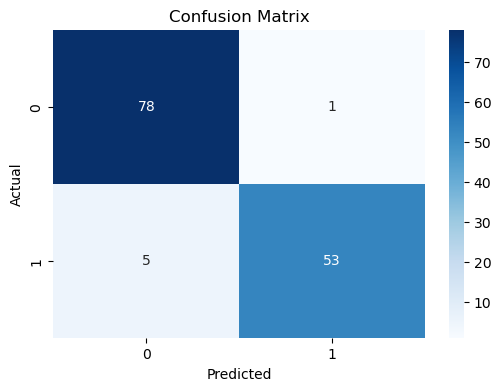

In [37]:
# Confusion matrixni hisoblash
cm = confusion_matrix(y_test, y_pred)

# Grafikni chizish
plt.figure(figsize=(6, 4))  # Grafikning o'lchamini belgilash
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Confusion matrixni heatmap tarzida chizish
plt.xlabel('Predicted')  # X o'qi: model tomonidan bashorat qilingan sinflar
plt.ylabel('Actual')  # Y o'qi: haqiqiy sinflar
plt.title('Confusion Matrix')  # Grafikning sarlavhasi
plt.show()  # Grafikka chiqarish